In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

Using TensorFlow backend.


# Load Data

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

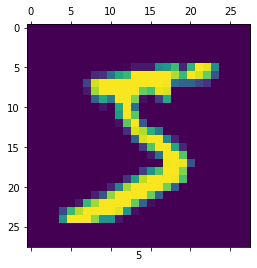

In [5]:
plt.matshow(X_train[0])
plt.xlabel(y_train[0])
plt.show()

# Normalize training data before training the neural net

In [7]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [8]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
# model.add(Dense(100, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2858 - accuracy: 0.9161
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1339 - accuracy: 0.9597
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0979 - accuracy: 0.9705
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0788 - accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0663 - accuracy: 0.9790
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0545 - accuracy: 0.9828
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0497 - accuracy: 0.9834
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0409 - accuracy: 0.9869
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0375 - accuracy: 0.9879
Epoch 10/10
60000/60000 [==============================

In [12]:
acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 25us/step


In [13]:
print('The accuracy is' , round(acc[1], 3))

The accuracy is 0.973


In [14]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([5.2988516e-09, 2.8336459e-07, 5.0043371e-07, 3.1761429e-05,
       8.5666092e-11, 1.6044986e-08, 1.3726691e-13, 9.9995315e-01,
       1.6201316e-06, 1.2606623e-05], dtype=float32)

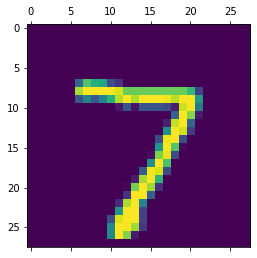

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

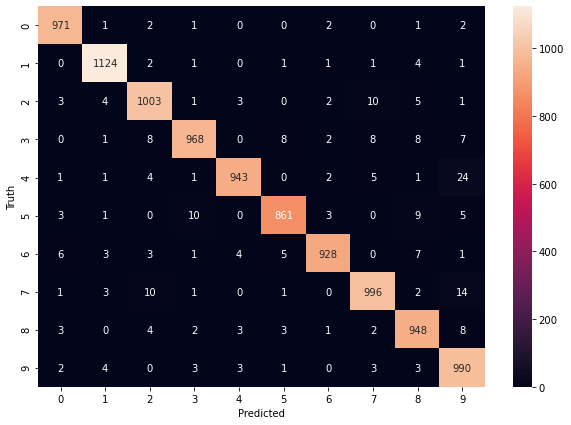

In [19]:
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

